<a href="https://colab.research.google.com/github/seungyoonnam/machine-learning/blob/main/iris_KN_LR_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [492]:
#데이터 불러오기
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')

df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [493]:
print(pd.unique(df['Species']))

['setosa' 'versicolor' 'virginica']


In [494]:
#클래스 분리

iris_input=df.drop(columns='Species').to_numpy()
iris_target=df['Species'].to_numpy()

In [495]:
#훈련세트 테스트세트 분리
#입력데이터는 iris_input으로, 정답데이터는 iris_target으
from sklearn.model_selection import train_test_split

#stratify: 샘플링편향 방지
train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, random_state=42, stratify=iris_target)

In [496]:
#데이터 정규화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_input = ss.transform(train_input)
test_input = ss.transform(test_input)

##k-최근접이웃

In [497]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)

print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9821428571428571
0.9210526315789473


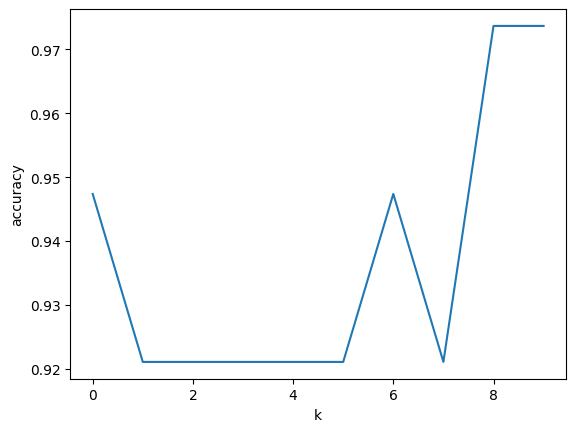

In [498]:
#최적화
import matplotlib.pyplot as plt

knn_test_score=[]

for k in range(1,11):
  kn=KNeighborsClassifier(n_neighbors=k)
  kn.fit(train_input, train_target)
  knn_test_score.append(kn.score(test_input, test_target))

plt.plot(knn_test_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [499]:
kn = KNeighborsClassifier(n_neighbors=9)
kn.fit(train_input, train_target)

print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9642857142857143
0.9736842105263158


##로지스틱 회귀

In [500]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9732142857142857
0.9210526315789473


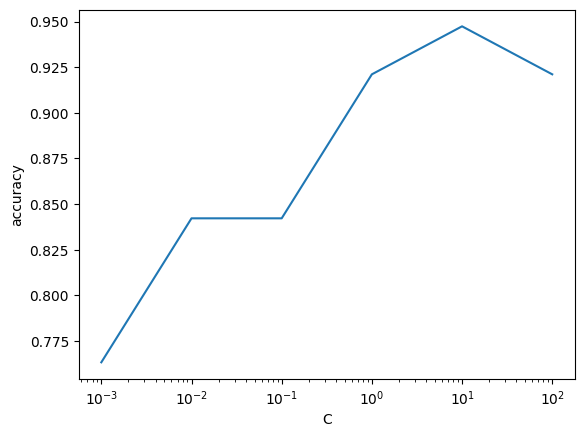

In [501]:
#최적화
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
lr_test_score=[]


for C in C_values:
  lr = LogisticRegression(C=C)
  lr.fit(train_input, train_target)
  lr_test_score.append(lr.score(test_input, test_target))

plt.plot(C_values, lr_test_score)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

In [502]:
lr = LogisticRegression(C=10)
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9821428571428571
0.9473684210526315


##경사하강법

In [503]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', random_state=42)

sc.fit(train_input, train_target)

print(sc.score(train_input, train_target))
print(sc.score(test_input, test_target))

0.8035714285714286
0.7894736842105263


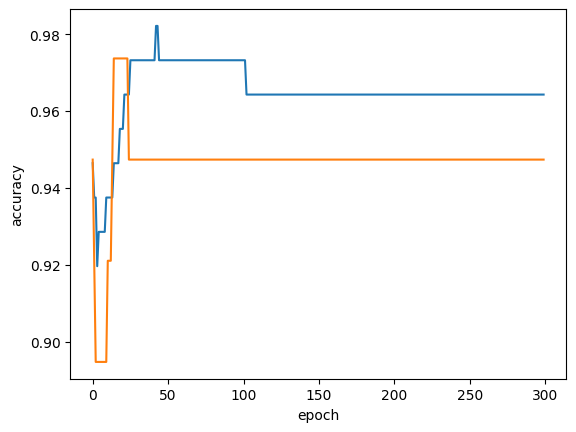

In [504]:
#최적화
train_score=[]
test_score=[]

for _ in range(0, 300):
  sc.partial_fit(train_input, train_target, classes=np.unique(train_target))
  train_score.append(sc.score(train_input, train_target))
  test_score.append(sc.score(test_input, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [506]:
sc = SGDClassifier(loss='log_loss', max_iter=150, tol=None, random_state=42)
sc.fit(train_input, train_target)

print(sc.score(train_input, train_target))
print(sc.score(test_input, test_target))

0.9642857142857143
0.9473684210526315
